<a href="https://colab.research.google.com/github/zrruziev/deep_learning_practice/blob/main/paper_to_code/vgg-19-tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-19 from scratch using Tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import L2
from tensorflow.keras import Model

In [2]:
!python --version
print(tf.__version__)

Python 3.8.16
2.9.2


## VGG-19_Architecture &emsp; [read more...](https://arxiv.org/pdf/1409.1556.pdf)

In [3]:
# tf.keras.backend.clear_session()

# Input
inputs = Input(shape=(224,224,3), name='input')

# Conv Block 1
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block1_conv_1')(inputs)
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block1_conv_2')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_pool')(x)

# Conv Block 2
x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block2_conv_1')(x)
x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block2_conv_2')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_pool')(x)

# Conv Block 3
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block3_conv_1')(x)
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block3_conv_2')(x)
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block3_conv_3')(x)
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block3_conv_4')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_pool')(x)

# Conv Block 4
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block4_conv_1')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block4_conv_2')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block4_conv_3')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block4_conv_4')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_pool')(x)

# Conv Block 5
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block5_conv_1')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block5_conv_2')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block5_conv_3')(x)
x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='block5_conv_4')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_pool')(x)

# Fully Connected Layers
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', kernel_regularizer=L2(l2=0.0005), name='fully_connected_1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', kernel_regularizer=L2(l2=0.0005), name='fully_connected_2')(x)
x = Dropout(0.5)(x)

# Outputs
outputs = Dense(units=1000, activation='softmax', name='output')(x)

# Create the Model
model = Model(inputs=inputs, outputs=outputs, name="VGG-19")
model.summary()

Model: "VGG-19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv_1 (Conv2D)      (None, 224, 224, 64)      1792      
                                                                 
 block1_conv_2 (Conv2D)      (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv_1 (Conv2D)      (None, 112, 112, 128)     73856     
                                                                 
 block2_conv_2 (Conv2D)      (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0    

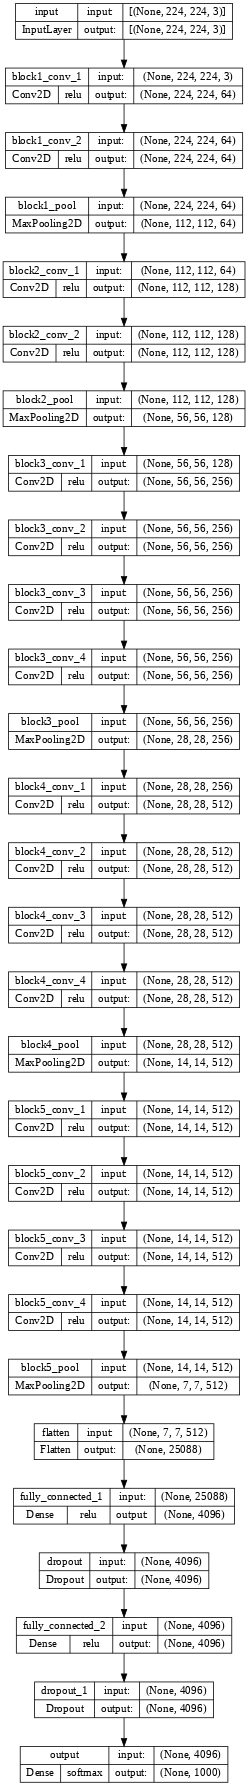

In [4]:
tf.keras.utils.plot_model(model, 'vgg-19.png', show_shapes=True, dpi=56, show_layer_activations=True)